In [38]:
% matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time as tm
import gsw as sw
from scipy.optimize import curve_fit
from scipy.stats import chi2

from scipy.stats import linregress

 

import numpy.ma as ma

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
#rc('text', usetex=True)

In [2]:
# set data directory 
indir = r'/Users/sclayton/Google Drive/work/MV1405/data/'

nutFile = r'%sclaire_data.xlsx' % indir
nut = pd.read_excel(nutFile, header = 2, sheet = 0)

# print nut.columns
transects = pd.unique(nut.Transect)

nut = nut[nut['Transect']!='Transect 9']
#nut = nut[nut['Transect']!='Transect 1']

vars = ['corr SST deg.', 'corr psu', 'Corr NO3', 'Corr PO4', 'Corr SiO4', 'Fluor', 'dFe', 'Pb', 'Lat', 'Lon', 'corr. Fv/Fm']

data = nut[vars]
data.rename(columns={'corr SST deg.': 'T', 'corr psu': 'S', 'Corr NO3' : 'NO3', 'Corr PO4' : 'PO4', 'Corr SiO4' : 'SiO4', 'corr. Fv/Fm' : 'FvFm'}, inplace=True)
data.dropna(axis = 0, how = 'all', inplace=True)

data['rho'] = sw.rho(data['S'], data['T'],0)
#print data


/Users/sclayton/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


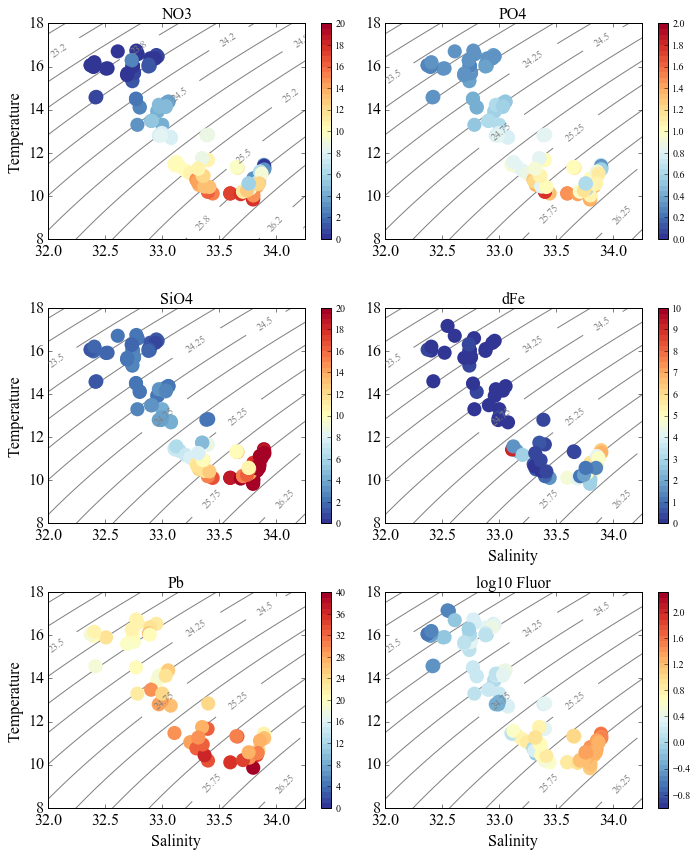

In [3]:
ss = np.arange(31, 35, 0.01)
tt = np.arange(7, 22, 0.1)

s, t = np.meshgrid(ss,tt, indexing='ij')
den = sw.rho(s,t,0)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10, 12), dpi = 300)

palette = plt.get_cmap('RdYlBu_r', 40)

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()


CS = ax1.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'
    
ax1.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

no = ax1.scatter(data['S'],data['T'], s = 200, lw = 0, c = data['NO3'], alpha = 1, vmin=0, vmax = 20, cmap = palette, zorder =1)
plt.colorbar(no, ax = ax1)
ax1.set_xlim([32.0, 34.25])
ax1.set_ylim([8, 18])

ax1.set_ylabel('Temperature', fontsize=16)
ax1.tick_params(labelsize=16)


ax1.set_title('NO3', fontsize=16)

######################################################################################################################################

CS = ax2.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)
ax2.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
po = ax2.scatter(data['S'],data['T'], s = 200, lw = 0, c = data['PO4'], alpha = 1, vmin=0, vmax = 2, cmap = palette, zorder =1)
plt.colorbar(po, ax = ax2)
ax2.set_xlim([32.0, 34.25])
ax2.set_ylim([8, 18])

ax2.tick_params(labelsize=16)

ax2.set_title('PO4', fontsize=16)

######################################################################################################################################

CS = ax3.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)
ax3.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
si = ax3.scatter(data['S'],data['T'], s = 200, lw = 0, c = data['SiO4'], alpha = 1, vmin=0, vmax = 20, cmap = palette, zorder =1)
plt.colorbar(si, ax = ax3)

ax3.set_xlim([32.0, 34.25])
ax3.set_ylim([8, 18])
ax3.set_ylabel('Temperature', fontsize=16)
ax3.tick_params(labelsize=16)

ax3.set_title('SiO4', fontsize=16)

######################################################################################################################################

CS = ax4.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)
ax4.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

fe = ax4.scatter(data['S'],data['T'], s = 200, lw = 0, c = data['dFe'], alpha = 1, vmin=0, vmax = 10, cmap = palette, zorder =1)
plt.colorbar(fe, ax = ax4)
ax4.set_xlim([32.0, 34.25])
ax4.set_ylim([8, 18])

ax4.set_xlabel('Salinity', fontsize=16)

ax4.tick_params(labelsize=16)


ax4.set_title('dFe', fontsize=16)

######################################################################################################################################

CS = ax5.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)
ax5.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
pb = ax5.scatter(data['S'],data['T'], s = 200, lw = 0, c = data['Pb'], alpha = 1, vmin=0, vmax = 40, cmap = palette, zorder =1)
plt.colorbar(pb, ax = ax5)
ax5.set_xlim([32.0, 34.25])
ax5.set_ylim([8, 18])
ax5.set_ylabel('Temperature', fontsize=16)
ax5.set_xlabel('Salinity', fontsize=16)
ax5.tick_params(labelsize=16)

ax5.set_title('Pb', fontsize=16)

######################################################################################################################################

CS = ax6.contour(s, t, den-1000, 25, colors= 'grey', zorder = 0)
ax6.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
fl = ax6.scatter(data['S'],data['T'], s = 200, lw = 0, c = np.log10(data['Fluor']), alpha = 1, vmin=-1, vmax = 2.3, cmap = palette, zorder =1)
plt.colorbar(fl, ax = ax6)
ax6.set_xlim([32.0, 34.25])
ax6.set_ylim([8, 18])

ax6.set_xlabel('Salinity', fontsize=16)
ax6.tick_params(labelsize=16)

ax6.set_title('log10 Fluor', fontsize=16)

plt.show()

fig2.savefig('../figures/nuts_fluo_TS.png', dpi = 300, bbox_inches = "tight")

[23.5, 26.0, 0, 50]

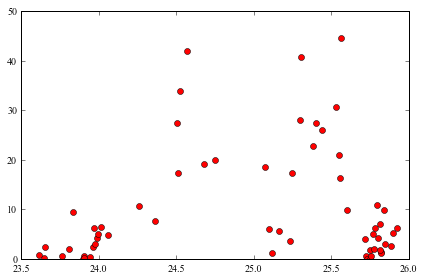

In [4]:
#plt.plot(data['rho']-1000, data['Pb'], 'o')
plt.plot(data['rho']-1000, data['NO3']/ data['dFe'], 'ro')
plt.axis([23.5, 26.0, 0, 50])

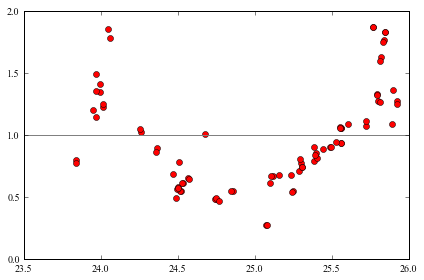

In [5]:
plt.plot(data['rho']-1000, data['SiO4']/ data['NO3'], 'ro')
plt.axis([23.5, 26.0, 0, 2])
plt.axhline(1, color = 'grey')

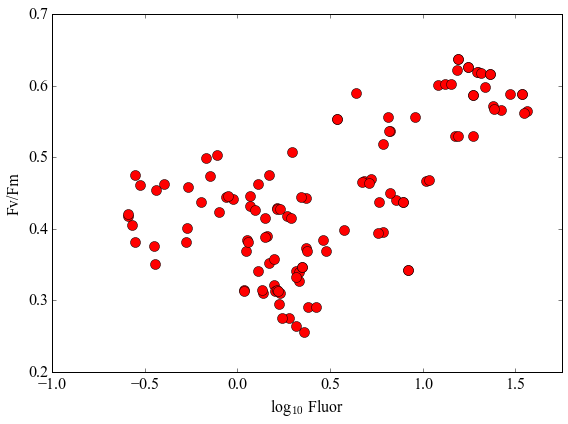

In [64]:
fig3 = plt.figure(figsize = (8, 6), dpi = 300)

plt.plot(np.log10(data['Fluor']), data['FvFm'], 'ro', markersize = 10)
plt.axis([-1, 1.75, 0.2, 0.7])

plt.ylabel('Fv/Fm', fontsize = 16)
plt.xlabel(r'log$_{10}$ Fluor', fontsize = 16)
plt.tick_params(labelsize=16)

#fig3.savefig('../figures/Fluor_FvFm.png', dpi = 300, bbox_inches = "tight")


In [63]:
indata = data[['dFe','FvFm','Fluor']]
indata['logFe'] = np.log10(indata['dFe'])
indata['logF'] = np.log10(indata['Fluor'])
indata.dropna(inplace = True)

ff = linregress(indata['logF'], indata['FvFm'])

print "r-squared:", ff[2]**2


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


r-squared: 0.440935128213


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
